In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv(r"C:\Users\karti\Desktop\Machine Hack\Flight_Ticket_Participant_Datasets\Data_Train.csv")
test = pd.read_csv(r"C:\Users\karti\Desktop\Machine Hack\Flight_Ticket_Participant_Datasets\Data_Test.csv")
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR ? DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [5]:
train = train.drop(columns = ["Route"])
test = test.drop(columns = ["Route"])

In [6]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,No info,13302


In [7]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [8]:
train["Airline"].unique(), train["Airline"].nunique()

(array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
        'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
        'Vistara Premium economy', 'Jet Airways Business',
        'Multiple carriers Premium economy', 'Trujet'], dtype=object),
 12)

In [9]:
train["Source"].nunique(), train["Destination"].nunique()

(5, 6)

In [10]:
import datetime

In [11]:
train["Date_of_Journey"] = pd.to_datetime(train["Date_of_Journey"])
test["Date_of_Journey"] = pd.to_datetime(test["Date_of_Journey"])

In [12]:
# Extracting Year, Month and Day from Date of Journey column for both train and test
train["Date_of_Journey_Year"] = train["Date_of_Journey"].dt.year
train["Date_of_Journey_Month"] = train["Date_of_Journey"].dt.month
train["Date_of_Journey_Day"] = train["Date_of_Journey"].dt.day

# For test 
test["Date_of_Journey_Year"] = test["Date_of_Journey"].dt.year
test["Date_of_Journey_Month"] = test["Date_of_Journey"].dt.month
test["Date_of_Journey_Day"] = test["Date_of_Journey"].dt.day

In [13]:
train = train.drop(columns = "Date_of_Journey")
test = test.drop(columns = "Date_of_Journey")

In [14]:
train.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_Year,Date_of_Journey_Month,Date_of_Journey_Day
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019,3,24
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662,2019,1,5
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,13882,2019,9,6
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218,2019,12,5
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,No info,13302,2019,1,3


In [15]:
test.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Date_of_Journey_Year,Date_of_Journey_Month,Date_of_Journey_Day
0,Jet Airways,Delhi,Cochin,17:30,04:25 07 Jun,10h 55m,1 stop,No info,2019,6,6
1,IndiGo,Kolkata,Banglore,06:20,10:20,4h,1 stop,No info,2019,12,5
2,Jet Airways,Delhi,Cochin,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,2019,5,21
3,Multiple carriers,Delhi,Cochin,08:00,21:00,13h,1 stop,No info,2019,5,21
4,Air Asia,Banglore,Delhi,23:55,02:45 25 Jun,2h 50m,non-stop,No info,2019,6,24


In [16]:
train["Dep_Time"] = pd.to_datetime(train["Dep_Time"])
test["Dep_Time"] = pd.to_datetime(test["Dep_Time"])

In [17]:
train["Dep_Time_hour"] = train["Dep_Time"].dt.hour
train["Dep_Time_min"] = train["Dep_Time"].dt.minute

test["Dep_Time_hour"] = test["Dep_Time"].dt.hour
test["Dep_Time_min"] = test["Dep_Time"].dt.minute

In [18]:
train = train.drop(columns = "Dep_Time")
test = test.drop(columns = "Dep_Time")

In [19]:
train.head()

,Airline,Source,Destination,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_Year,Date_of_Journey_Month,Date_of_Journey_Day,Dep_Time_hour,Dep_Time_min
0,IndiGo,Banglore,New Delhi,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019,3,24,22,20
1,Air India,Kolkata,Banglore,13:15,7h 25m,2 stops,No info,7662,2019,1,5,5,50
2,Jet Airways,Delhi,Cochin,04:25 10 Jun,19h,2 stops,No info,13882,2019,9,6,9,25
3,IndiGo,Kolkata,Banglore,23:30,5h 25m,1 stop,No info,6218,2019,12,5,18,5
4,IndiGo,Banglore,New Delhi,21:35,4h 45m,1 stop,No info,13302,2019,1,3,16,50


In [20]:
test.head()

,Airline,Source,Destination,Arrival_Time,Duration,Total_Stops,Additional_Info,Date_of_Journey_Year,Date_of_Journey_Month,Date_of_Journey_Day,Dep_Time_hour,Dep_Time_min
0,Jet Airways,Delhi,Cochin,04:25 07 Jun,10h 55m,1 stop,No info,2019,6,6,17,30
1,IndiGo,Kolkata,Banglore,10:20,4h,1 stop,No info,2019,12,5,6,20
2,Jet Airways,Delhi,Cochin,19:00 22 May,23h 45m,1 stop,In-flight meal not included,2019,5,21,19,15
3,Multiple carriers,Delhi,Cochin,21:00,13h,1 stop,No info,2019,5,21,8,0
4,Air Asia,Banglore,Delhi,02:45 25 Jun,2h 50m,non-stop,No info,2019,6,24,23,55


In [21]:
train["Arrival_Time"] = pd.to_datetime(train["Arrival_Time"])
test["Arrival_Time"] = pd.to_datetime(test["Arrival_Time"])

In [22]:
train["Arrival_Time_hour"] = train["Arrival_Time"].dt.hour
train["Arrival_Time_min"] = train["Arrival_Time"].dt.minute

test["Arrival_Time_hour"] = test["Arrival_Time"].dt.hour
test["Arrival_Time_min"] = test["Arrival_Time"].dt.minute

In [23]:
train = train.drop(columns = "Arrival_Time")
test = test.drop(columns = "Arrival_Time")

In [24]:
train.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_Year,Date_of_Journey_Month,Date_of_Journey_Day,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897,2019,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,2019,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,19h,2 stops,No info,13882,2019,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,No info,6218,2019,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,No info,13302,2019,1,3,16,50,21,35


In [25]:
test.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Date_of_Journey_Year,Date_of_Journey_Month,Date_of_Journey_Day,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,Jet Airways,Delhi,Cochin,10h 55m,1 stop,No info,2019,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,4h,1 stop,No info,2019,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,23h 45m,1 stop,In-flight meal not included,2019,5,21,19,15,19,0
3,Multiple carriers,Delhi,Cochin,13h,1 stop,No info,2019,5,21,8,0,21,0
4,Air Asia,Banglore,Delhi,2h 50m,non-stop,No info,2019,6,24,23,55,2,45


In [26]:
# The duration column is in the form of string i.e. there is hours "h" and minutes "m". Therefore to change this into minutes
# the following is to be done: - 

duration_train = list(train["Duration"])

for i in range (len(duration_train)):
    if len(duration_train[i].split())!=2: 
#To check if duration has both hours and minutes , if yes , implement the below logic
        if "h" in duration_train[i]:
            duration_train[i] = duration_train[i].strip() + " 0m"
        else:
            duration_train[i] = "0h " + duration_train[i]
            
duration_train_hours = []
duration_train_mins = []

for i in range(len(duration_train)):
    duration_train_hours.append(int(duration_train[i].split(sep = 'h')[0]))
    # To get hours in duration
    duration_train_mins.append(int(duration_train[i].split(sep = 'm')[0].split()[-1]))
    # To get minutes in duration
# -------------------------------------------------------------------------------------------------    

duration_test = list(test["Duration"])

for i in range (len(duration_test)):
    if len(duration_test[i].split())!=2: 
#To check if duration has both hours and minutes , if yes , implement the below logic
        if "h" in duration_test[i]:
            duration_test[i] = duration_test[i].strip() + " 0m"
        else:
            duration_test[i] = "0h " + duration_test[i]
            
duration_test_hours = []
duration_test_mins = []

for i in range(len(duration_test)):
    duration_test_hours.append(int(duration_test[i].split(sep = 'h')[0]))
    # To get hours in duration
    duration_test_mins.append(int(duration_test[i].split(sep = 'm')[0].split()[-1]))
    # To get minutes in duration

In [27]:
train['Duration_hours'] = duration_train_hours
train['Duration_minutes'] = duration_train_mins

#---------------------------------------------

test['Duration_hours'] = duration_test_hours
test['Duration_minutes'] = duration_test_mins

In [28]:
#Splitting duration  time

#a=df_train['Duration'].str.split(' ',expand=True)
#a[1].fillna('00m',inplace=True)
#df_train['dur_hr']=a[0].apply(lambda x: x[:-1])
#df_train['dur_min']=a[1].apply(lambda x: x[:-1])

In [29]:
train = train.drop(columns = "Duration")
test = test.drop(columns = "Duration")

In [30]:
train.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date_of_Journey_Year,Date_of_Journey_Month,Date_of_Journey_Day,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,2019,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,No info,7662,2019,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,2019,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,2019,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,2019,1,3,16,50,21,35,4,45


In [31]:
test.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Date_of_Journey_Year,Date_of_Journey_Month,Date_of_Journey_Day,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_minutes
0,Jet Airways,Delhi,Cochin,1 stop,No info,2019,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,1 stop,No info,2019,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,1 stop,In-flight meal not included,2019,5,21,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,1 stop,No info,2019,5,21,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,non-stop,No info,2019,6,24,23,55,2,45,2,50


In [32]:
train["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [33]:
test.isna().any()

Airline                  False
Source                   False
Destination              False
Total_Stops              False
Additional_Info          False
Date_of_Journey_Year     False
Date_of_Journey_Month    False
Date_of_Journey_Day      False
Dep_Time_hour            False
Dep_Time_min             False
Arrival_Time_hour        False
Arrival_Time_min         False
Duration_hours           False
Duration_minutes         False
dtype: bool

In [34]:
count_nan = len(train) - train.count()
count_nan

Airline                  0
Source                   0
Destination              0
Total_Stops              1
Additional_Info          0
Price                    0
Date_of_Journey_Year     0
Date_of_Journey_Month    0
Date_of_Journey_Day      0
Dep_Time_hour            0
Dep_Time_min             0
Arrival_Time_hour        0
Arrival_Time_min         0
Duration_hours           0
Duration_minutes         0
dtype: int64

In [35]:
train = train.dropna(subset=['Total_Stops'])
test = test.dropna(subset=['Total_Stops'])

In [36]:
train.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date_of_Journey_Year,Date_of_Journey_Month,Date_of_Journey_Day,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,2019,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,No info,7662,2019,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,2019,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,2019,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,2019,1,3,16,50,21,35,4,45


In [37]:
count_nan = len(train) - train.count()
count_nan

Airline                  0
Source                   0
Destination              0
Total_Stops              0
Additional_Info          0
Price                    0
Date_of_Journey_Year     0
Date_of_Journey_Month    0
Date_of_Journey_Day      0
Dep_Time_hour            0
Dep_Time_min             0
Arrival_Time_hour        0
Arrival_Time_min         0
Duration_hours           0
Duration_minutes         0
dtype: int64

In [38]:
train["Additional_Info"].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Airline                10682 non-null  object
 1   Source                 10682 non-null  object
 2   Destination            10682 non-null  object
 3   Total_Stops            10682 non-null  object
 4   Additional_Info        10682 non-null  object
 5   Price                  10682 non-null  int64 
 6   Date_of_Journey_Year   10682 non-null  int64 
 7   Date_of_Journey_Month  10682 non-null  int64 
 8   Date_of_Journey_Day    10682 non-null  int64 
 9   Dep_Time_hour          10682 non-null  int64 
 10  Dep_Time_min           10682 non-null  int64 
 11  Arrival_Time_hour      10682 non-null  int64 
 12  Arrival_Time_min       10682 non-null  int64 
 13  Duration_hours         10682 non-null  int64 
 14  Duration_minutes       10682 non-null  int64 
dtypes: int64(10), objec

In [40]:
train.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date_of_Journey_Year,Date_of_Journey_Month,Date_of_Journey_Day,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,2019,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,No info,7662,2019,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,2019,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,2019,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,2019,1,3,16,50,21,35,4,45


In [41]:
train["Date_of_Journey_Year"].nunique(), test["Date_of_Journey_Year"].nunique()

(1, 1)

In [42]:
train["Source"].unique(), train["Destination"].unique()

(array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object),
 array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
       dtype=object))

In [43]:
train.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date_of_Journey_Year,Date_of_Journey_Month,Date_of_Journey_Day,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,2019,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,No info,7662,2019,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,2019,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,2019,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,2019,1,3,16,50,21,35,4,45


In [44]:
train["Additional_Info"].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
1 Short layover                    1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [45]:
(8344/10682)*100

78.1127129750983

In [46]:
# The Additional_Info column is to be dropped as 80% of the values are "No Info" which leads to give no information about the
# dataset.
train = train.drop(columns = "Additional_Info")
test = test.drop(columns = "Additional_Info")

In [47]:
train.head()

,Airline,Source,Destination,Total_Stops,Price,Date_of_Journey_Year,Date_of_Journey_Month,Date_of_Journey_Day,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,non-stop,3897,2019,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,2019,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,2019,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,2019,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,2019,1,3,16,50,21,35,4,45


Text(0.5, 1.0, 'corr_train.corr()')

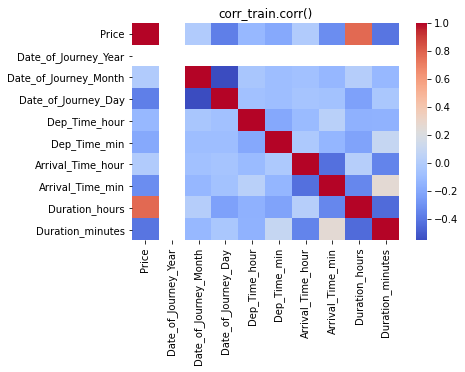

In [48]:
corr_train = train.corr()
sns.heatmap(corr_train.corr(),cmap='coolwarm')
plt.title('corr_train.corr()')

In [49]:
train = train.drop(columns = "Date_of_Journey_Year")
test = test.drop(columns = "Date_of_Journey_Year")

In [50]:
train.head()

,Airline,Source,Destination,Total_Stops,Price,Date_of_Journey_Month,Date_of_Journey_Day,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,non-stop,3897,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


Text(0.5, 1.0, 'Heatmap - Correlation plot')

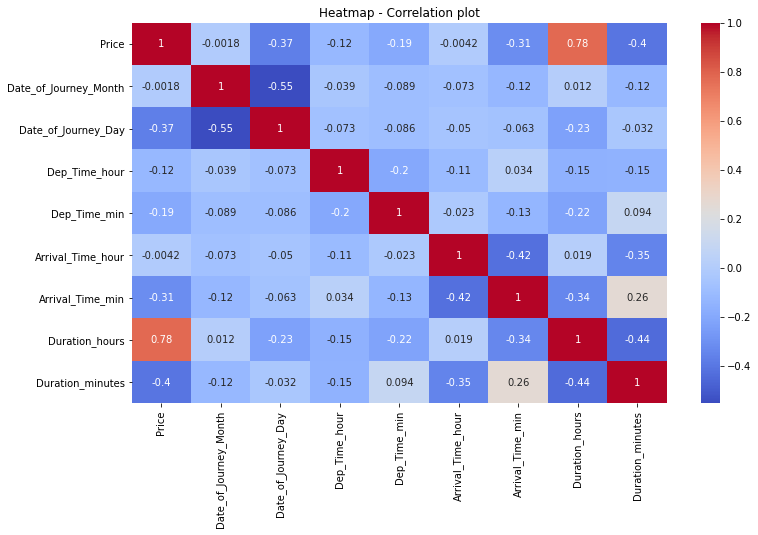

In [51]:
corr_train1 = train.corr()
plt.figure(figsize=(12,7))
sns.heatmap(corr_train1.corr(), cmap = "coolwarm", annot = True)
plt.title("Heatmap - Correlation plot")

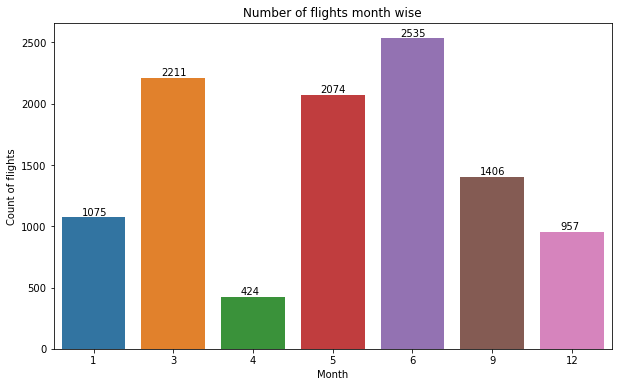

In [52]:
plt.figure(figsize = (10,6))
plt.title("Number of flights month wise")
ct = sns.countplot(x = "Date_of_Journey_Month", data = train)
plt.xlabel("Month")
plt.ylabel("Count of flights")
for p in ct.patches:
    ct.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

In [53]:
# From the above plot, we can understand that in april the number of flights are the least whereas the most in June.

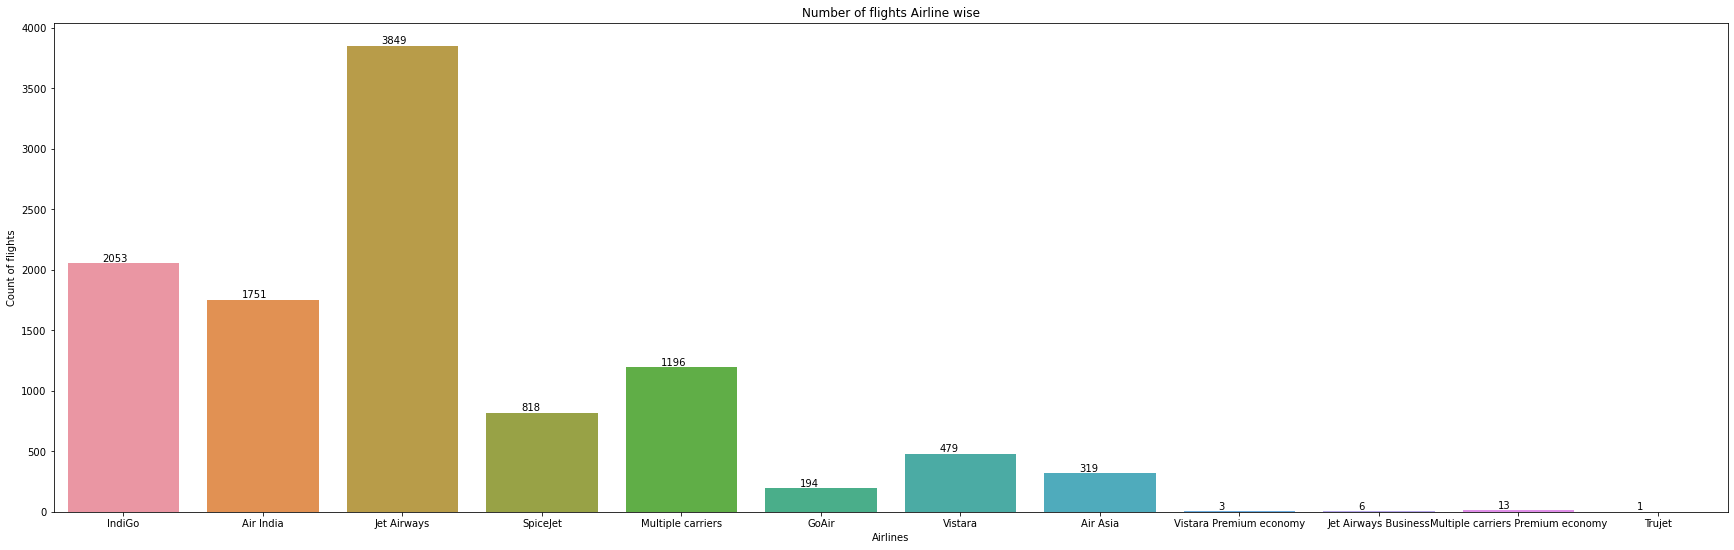

In [54]:
# Find count of flight airline wise

plt.figure(figsize = (30,9))
plt.title("Number of flights Airline wise")
ct = sns.countplot(x = "Airline", data = train)
plt.xlabel("Airlines")
plt.ylabel("Count of flights")
for p in ct.patches:
    ct.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

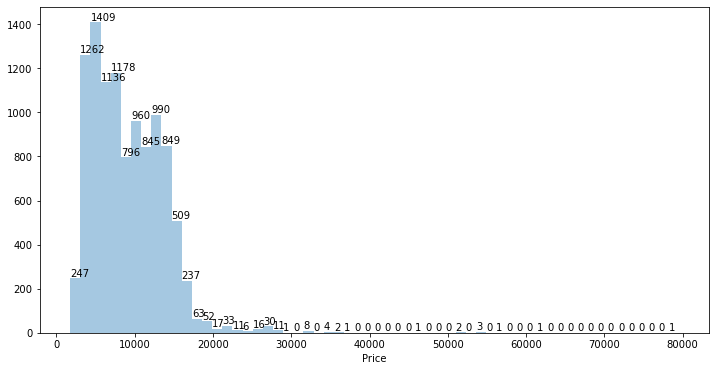

In [55]:
plt.figure(figsize = (12,6))
dp = sns.distplot(train["Price"], kde = False, bins = 60)
for p in dp.patches:
    dp.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

In [56]:
train["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [57]:
#flight["Total_Stops"] = flight["Total_Stops"].replace(to_replace ={"non-stop"}, value = 0, regex = True)
#flight["Total_Stops"] = flight["Total_Stops"].replace(to_replace ={"2 stops"}, value = 2, regex = True)
#flight["Total_Stops"] = flight["Total_Stops"].replace(to_replace ={"1 stop"}, value = 1, regex = True)
#flight["Total_Stops"] = flight["Total_Stops"].replace(to_replace ={"3 stops"}, value = 3, regex = True)
#flight["Total_Stops"] = flight["Total_Stops"].replace(to_replace ={"4 stops"}, value = 4, regex = True)

train["Total_Stops"] = train["Total_Stops"].replace({"non-stop":0, "2 stops":2, "1 stop":1, "3 stops":3, "4 stops":4})
test["Total_Stops"] = test["Total_Stops"].replace({"non-stop":0, "2 stops":2, "1 stop":1, "3 stops":3, "4 stops":4})

In [58]:
train.head()

,Airline,Source,Destination,Total_Stops,Price,Date_of_Journey_Month,Date_of_Journey_Day,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,0,3897,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [59]:
test.head()

,Airline,Source,Destination,Total_Stops,Date_of_Journey_Month,Date_of_Journey_Day,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_minutes
0,Jet Airways,Delhi,Cochin,1,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,1,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,1,5,21,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,1,5,21,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,0,6,24,23,55,2,45,2,50


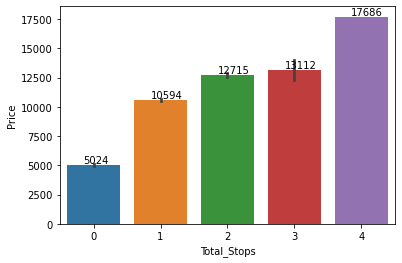

In [60]:
bp = sns.barplot(x = "Total_Stops", y = "Price", data = train)
for p in bp.patches:
    bp.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

(array([-10000.,      0.,  10000.,  20000.,  30000.,  40000.,  50000.,
         60000.,  70000.,  80000.,  90000.]),
 <a list of 11 Text major ticklabel objects>)

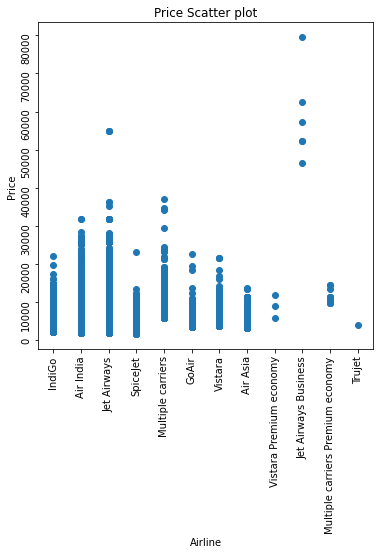

In [61]:
plt.figure(figsize = (6,6))
plt.title("Price Scatter plot")
plt.scatter(train["Airline"], train["Price"])
plt.xticks(rotation = 90)
plt.xlabel("Airline")
plt.ylabel("Price")
plt.yticks(rotation = 90)

In [62]:
# Lets combine the lest taken and classes or airlines and combine

train["Airline"] = train["Airline"].replace({"Vistara Premium economy":"Other", "Jet Airways Business":"Other", 
                                             "Multiple carriers Premium economy":"Other", "Trujet":"Other"})
test["Airline"] = test["Airline"].replace({"Vistara Premium economy":"Other", "Jet Airways":"Other", 
                                           "Multiple carriers Premium economy":"Other", "Trujet":"Other"})

In [63]:
train["Airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia', 'Other'],
      dtype=object)

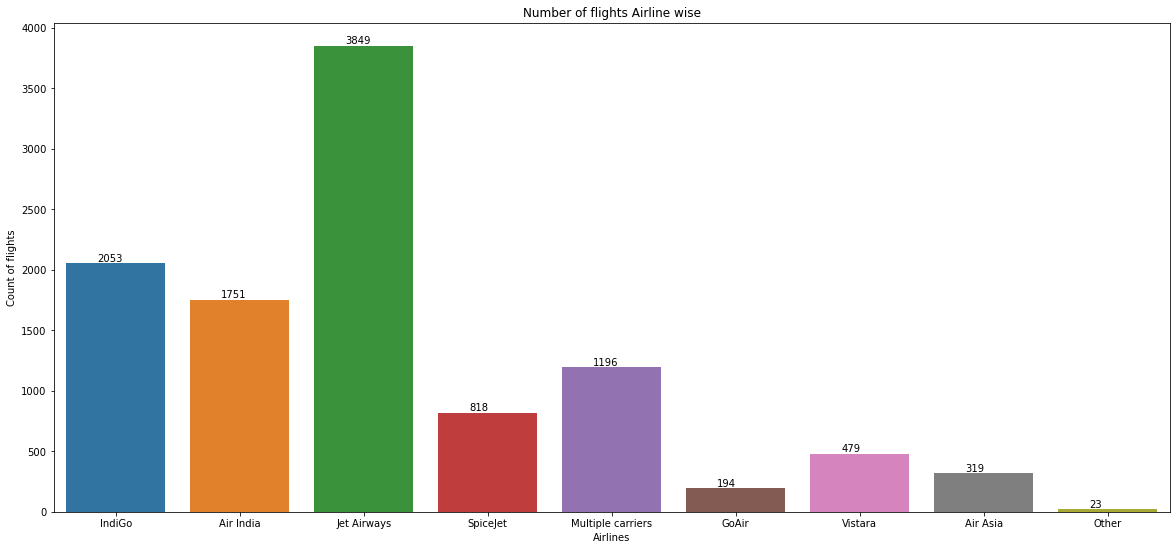

In [64]:
# Find count of flight airline wise

plt.figure(figsize = (20,9))
plt.title("Number of flights Airline wise")
ct = sns.countplot(x = "Airline", data = train)
plt.xlabel("Airlines")
plt.ylabel("Count of flights")
for p in ct.patches:
    ct.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

(array([-10000.,      0.,  10000.,  20000.,  30000.,  40000.,  50000.,
         60000.,  70000.,  80000.,  90000.]),
 <a list of 11 Text major ticklabel objects>)

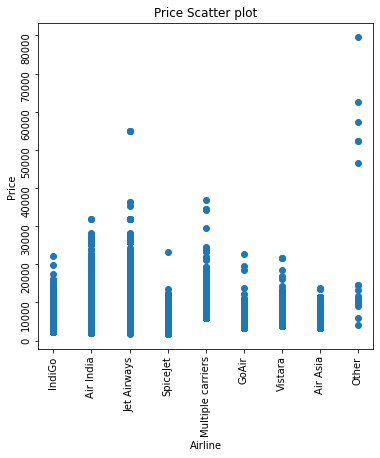

In [65]:
plt.figure(figsize = (6,6))
plt.title("Price Scatter plot")
plt.scatter(train["Airline"], train["Price"])
plt.xticks(rotation = 90)
plt.xlabel("Airline")
plt.ylabel("Price")
plt.yticks(rotation = 90)

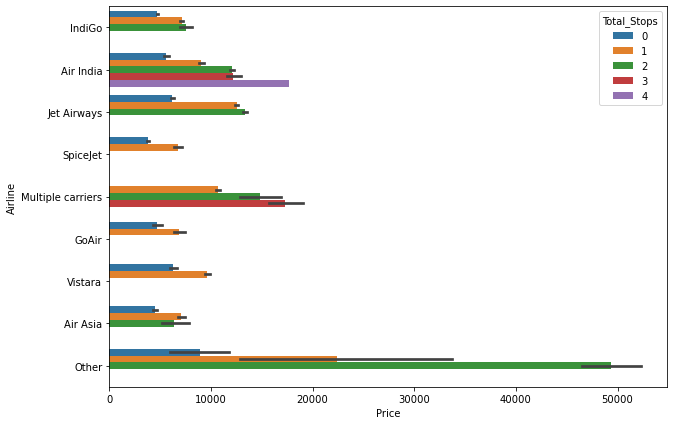

In [66]:
plt.figure(figsize=(10,7))
sns.barplot(y=train['Airline'],x=train['Price'],hue=train['Total_Stops'])

In [67]:
train.head()

,Airline,Source,Destination,Total_Stops,Price,Date_of_Journey_Month,Date_of_Journey_Day,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,0,3897,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [68]:
dummies = pd.get_dummies(train[["Airline","Source","Destination"]], drop_first = True)
train = train.drop(["Airline","Source","Destination"], axis = 1)
train = pd.concat([train,dummies], axis = 1)

# --------------------------------------------------------------------------------------

dummies = pd.get_dummies(test[["Airline","Source","Destination"]], drop_first = True)
test = test.drop(["Airline","Source","Destination"], axis = 1)
test = pd.concat([test,dummies], axis = 1)

In [69]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [70]:
train.head()

,Total_Stops,Price,Date_of_Journey_Month,Date_of_Journey_Day,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Other,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,3,24,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


**Feature Selection**

In [71]:
train.shape

(10682, 27)

In [72]:
test.shape

(2671, 26)

In [73]:
train.columns

Index(['Total_Stops', 'Price', 'Date_of_Journey_Month', 'Date_of_Journey_Day', 'Dep_Time_hour', 'Dep_Time_min', 'Arrival_Time_hour', 'Arrival_Time_min', 'Duration_hours', 'Duration_minutes', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Multiple carriers', 'Airline_Other', 'Airline_SpiceJet', 'Airline_Vistara', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_New Delhi'], dtype='object')

In [74]:
X = train.loc[:,['Total_Stops', 'Date_of_Journey_Month', 'Date_of_Journey_Day', 'Dep_Time_hour', 'Dep_Time_min', 
                 'Arrival_Time_hour', 'Arrival_Time_min', 'Duration_hours', 'Duration_minutes', 'Airline_Air India', 
                 'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Multiple carriers', 'Airline_Other', 
                 'Airline_SpiceJet', 'Airline_Vistara', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 
                 'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata', 
                 'Destination_New Delhi']]
X.head()

,Total_Stops,Date_of_Journey_Month,Date_of_Journey_Day,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Other,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3,24,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [75]:
y = train.iloc[:, 1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [76]:
from sklearn.ensemble import ExtraTreesRegressor

In [77]:
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [78]:
print(selection.feature_importances_)

[0.24174518 0.08987888 0.11485157 0.02524779 0.02448028 0.02942031
 0.02154895 0.11845024 0.01773623 0.01074537 0.00199054 0.02348569
 0.1362313  0.01566277 0.03282241 0.00391412 0.00485378 0.00057091
 0.00773973 0.00479333 0.00678594 0.01203142 0.01269531 0.00750761
 0.00048255 0.03432779]


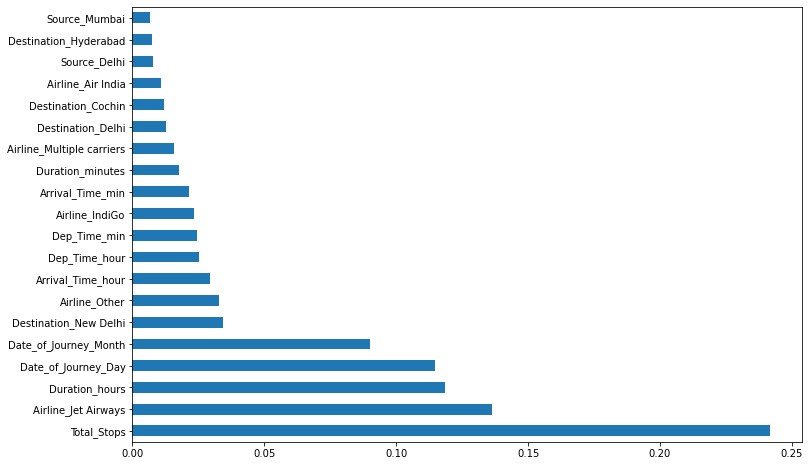

In [79]:
# Plot a graph showing the most significant variables 

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [80]:
# be generated by our model in final step
X = train.drop(["Price"], axis=1)
y = np.log1p(train["Price"])
# y = df_train["Price"]
X_test = test

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
y_test

6075     9.720526
3544     8.509161
9291     9.125654
5032     8.258163
2483     9.464905
           ...   
9797     8.910451
9871     8.438799
10063    8.916372
8802     9.085344
8617     9.557611
Name: Price, Length: 2137, dtype: float64

In [84]:
from sklearn.preprocessing import StandardScaler

In [85]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Creating a Model

# 1. Linear Regression

In [86]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [87]:
lr.fit(X_train, y_train)

LinearRegression()

# Prediction from our Models

In [88]:
predictions = lr.predict(X_test)

**Scatter Plot**

Text(0, 0.5, 'predictions')

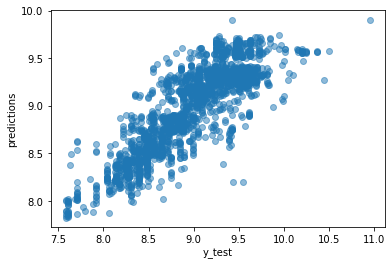

In [89]:
plt.scatter(y_test, predictions, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("predictions")

**Residual Histogram**

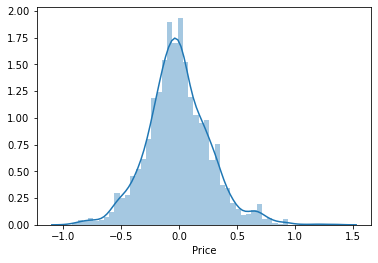

In [90]:
sns.distplot((y_test-predictions), bins = 50)

# Regression Evaluation Metrics

In [91]:
from sklearn import metrics

In [92]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.20624294810255808
MSE: 0.07479040983656486
RMSE: 0.2734783535063879


# 2. XgBoostRegressor

In [93]:
from sklearn.ensemble import RandomForestRegressor

In [94]:
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [95]:
y_pred = reg_rf.predict(X_test)

In [96]:
reg_rf.score(X_train, y_train)

0.9624156673828663

In [97]:
reg_rf.score(X_test, y_test)

0.8695440526617003

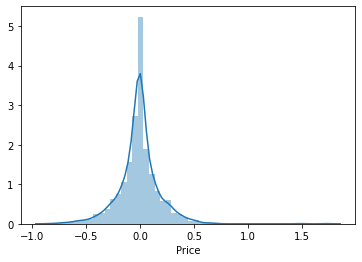

In [98]:
sns.distplot((y_test-y_pred), bins = 50)

Text(0, 0.5, 'y_pred')

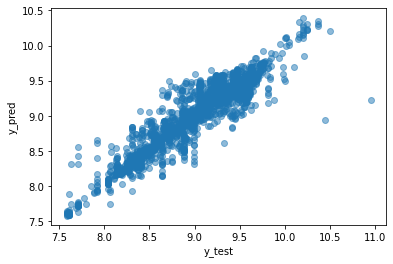

In [99]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")

In [100]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.1239184196878459
MSE: 0.03549624688264165
RMSE: 0.1884044768115706


# HyperParameter Tuning

**Using RandomizedSearchCV for HyperParameter tuning**

In [101]:
from sklearn.model_selection import RandomizedSearchCV

In [102]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1200, num = 22)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 50, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [103]:
# Create a random grid

random_grid = {"n_estimators":n_estimators,
               "max_features":max_features,
               "max_depth":max_depth,
               "min_samples_split":min_samples_split,
               "min_samples_leaf":min_samples_leaf}

In [104]:
# Random search of parameters, using 10 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', 
                               n_iter = 10, cv = 10, verbose=2, random_state=42, n_jobs = 1)

In [105]:
rf_random.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] n_estimators=123, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=123, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.9s
[CV] n_estimators=123, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV]  n_estimators=123, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.8s
[CV] n_estimators=123, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=123, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.8s
[CV] n_estimators=123, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=123, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.7s
[CV] n_estimators=123, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=123, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.7s
[CV] n_estimators=123, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=123, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.7s
[CV] n_estimators=123, min_samples

[CV]  n_estimators=690, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=32, total=  11.7s
[CV] n_estimators=690, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=32 
[CV]  n_estimators=690, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=32, total=  11.7s
[CV] n_estimators=690, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=32 
[CV]  n_estimators=690, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=32, total=  11.5s
[CV] n_estimators=690, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=32 
[CV]  n_estimators=690, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=32, total=  11.5s
[CV] n_estimators=690, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=32 
[CV]  n_estimators=690, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=32, total=  11.5s
[CV] n_estimators=690, min_samples_split=2, min_samp

[CV]  n_estimators=180, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=32, total=   1.7s
[CV] n_estimators=180, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=32 
[CV]  n_estimators=180, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=32, total=   1.7s
[CV] n_estimators=180, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=32 
[CV]  n_estimators=180, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=32, total=   1.7s
[CV] n_estimators=180, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=32 
[CV]  n_estimators=180, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=32, total=   1.8s
[CV] n_estimators=180, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=32 
[CV]  n_estimators=180, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=32, total=   1.7s
[CV] n_estimators=180, min_samples

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 22.3min finished


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 14, 23, 32, 41, 50],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [10, 66, 123, 180, 236,
                                                         293, 350, 406, 463,
                                                         520, 576, 633, 690,
                                                         746, 803, 860, 916,
                                                         973, 1030, 1086, 1143,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [106]:
rf_random.best_params_

{'n_estimators': 860,
 'min_samples_split': 10,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 32}

In [107]:
rf_random.best_score_

-0.03176886991037433

In [108]:
prediction = rf_random.predict(X_test)

In [109]:
prediction

array([9.70295522, 8.70637719, 9.05279388, ..., 8.80084064, 9.40120867,
       9.41491431])

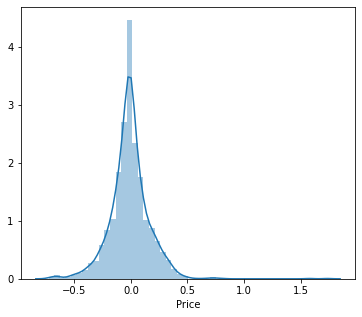

In [110]:
plt.figure(figsize = (6,5))
sns.distplot(y_test-prediction)

Text(0, 0.5, 'prediction')

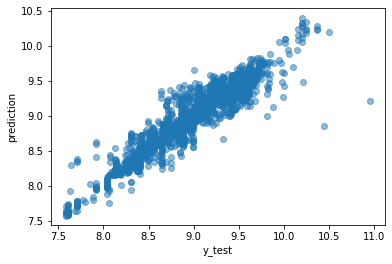

In [111]:
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("prediction")

In [112]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))
print("R2 score :", metrics.r2_score(y_test, prediction))

MAE: 0.12046032871055792
MSE: 0.030778529182369632
RMSE: 0.175438106414683
R2 score : 0.8868826274664812


In [113]:
y_train_xgb_pred = rf_random.predict(X_train)
y_test_xgb_pred = rf_random.predict(X_test)

In [114]:
y_train_xgb_pred, y_test_xgb_pred

(array([9.07899562, 9.35561788, 8.72844235, ..., 8.90796078, 8.75885007,
        9.33819527]),
 array([9.70295522, 8.70637719, 9.05279388, ..., 8.80084064, 9.40120867,
        9.41491431]))

# 3.RandomForest Regressor

In [115]:
from sklearn.ensemble import RandomForestRegressor

In [116]:
rfr = RandomForestRegressor(n_jobs = -1)
rfr.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [117]:
#estimators = np.arange(10, 200, 10)
#scores = []
#for n in estimators:
#    rfr.set_params(n_estimators=n)
#    rfr.fit(X_train, y_train)
#    scores.append(model.score(X_test, y_test))
#plt.title("Effect of n_estimators")
#plt.xlabel("n_estimator")
#plt.ylabel("score")
#plt.plot(estimators, scores)

In [118]:
y_rfr_pred = rfr.predict(X_test)

In [119]:
rfr.score(X_train, y_train)

0.9623546132538197

In [120]:
rfr.score(X_test, y_test)

0.8712051118695986

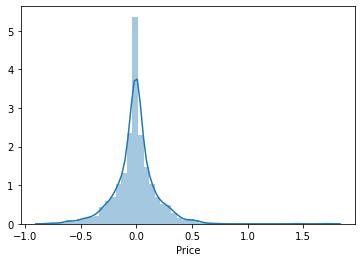

In [121]:
sns.distplot((y_test-y_rfr_pred), bins = 50)

Text(0, 0.5, 'y_rfr_pred')

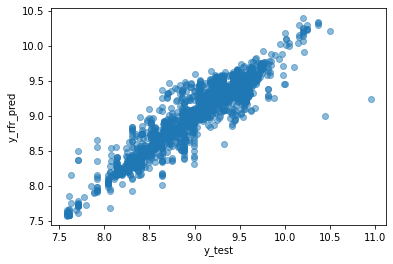

In [122]:
plt.scatter(y_test, y_rfr_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_rfr_pred")

In [123]:
print('MAE:', metrics.mean_absolute_error(y_test, y_rfr_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_rfr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_rfr_pred)))
print("R2 score :", metrics.r2_score(y_test, y_rfr_pred))

MAE: 0.12359462717822667
MSE: 0.03504428306701471
RMSE: 0.18720118340174752
R2 score : 0.8712051118695987


# RandomizedSearchCV for RandomForestRegressor

In [124]:
from sklearn.model_selection import RandomizedSearchCV

In [125]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 5, stop = 1200, num = 22)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 50, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [126]:
# Create a random grid

random_rfr_grid = {"n_estimators":n_estimators,
               "max_features":max_features,
               "max_depth":max_depth,
               "min_samples_split":min_samples_split,
               "min_samples_leaf":min_samples_leaf}

In [127]:
# Random search of parameters, using 10 fold cross validation, 
# search across 100 different combinations
rfr_random = RandomizedSearchCV(estimator = rfr, param_distributions = random_rfr_grid,scoring='neg_mean_squared_error', 
                               n_iter = 10, cv = 10, verbose=2, random_state=42, n_jobs = 1)

In [128]:
rfr_random.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] n_estimators=118, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=118, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   5.6s
[CV] n_estimators=118, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.5s remaining:    0.0s


[CV]  n_estimators=118, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.1s
[CV] n_estimators=118, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=118, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.0s
[CV] n_estimators=118, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=118, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.0s
[CV] n_estimators=118, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=118, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.1s
[CV] n_estimators=118, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=118, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.1s
[CV] n_estimators=118, min_samples

[CV]  n_estimators=687, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=32, total=   9.6s
[CV] n_estimators=687, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=32 
[CV]  n_estimators=687, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=32, total=   8.7s
[CV] n_estimators=687, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=32 
[CV]  n_estimators=687, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=32, total=   8.5s
[CV] n_estimators=687, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=32 
[CV]  n_estimators=687, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=32, total=   8.5s
[CV] n_estimators=687, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=32 
[CV]  n_estimators=687, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=32, total=   8.6s
[CV] n_estimators=687, min_samples_split=2, min_samp

[CV]  n_estimators=175, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=32, total=   1.6s
[CV] n_estimators=175, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=32 
[CV]  n_estimators=175, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=32, total=   1.7s
[CV] n_estimators=175, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=32 
[CV]  n_estimators=175, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=32, total=   1.6s
[CV] n_estimators=175, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=32 
[CV]  n_estimators=175, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=32, total=   1.7s
[CV] n_estimators=175, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=32 
[CV]  n_estimators=175, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=32, total=   1.6s
[CV] n_estimators=175, min_samples

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 11.1min finished


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(n_jobs=-1), n_jobs=1,
                   param_distributions={'max_depth': [5, 14, 23, 32, 41, 50],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [5, 61, 118, 175, 232,
                                                         289, 346, 403, 460,
                                                         517, 574, 630, 687,
                                                         744, 801, 858, 915,
                                                         972, 1029, 1086, 1143,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbo

In [129]:
rfr_random.best_params_

{'n_estimators': 858,
 'min_samples_split': 10,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 32}

In [130]:
rfr_random.best_score_

-0.03172566964700583

In [131]:
predictions_rfr=rfr_random.predict(X_test)

In [132]:
predictions_rfr

array([9.69891998, 8.72072943, 9.04947637, ..., 8.80343967, 9.40180066,
       9.41842472])

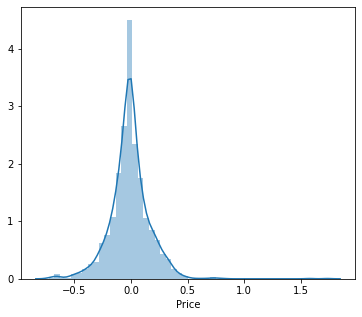

In [133]:
plt.figure(figsize = (6,5))
sns.distplot(y_test-predictions_rfr)

Text(0, 0.5, 'predictions_rfr')

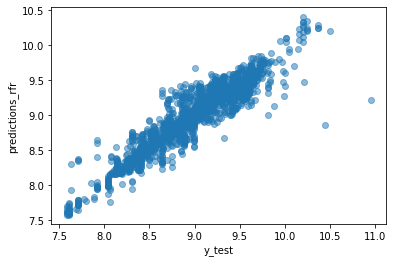

In [134]:
plt.scatter(y_test, predictions_rfr, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("predictions_rfr")

In [135]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions_rfr))
print('MSE:', metrics.mean_squared_error(y_test, predictions_rfr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_rfr)))
print("R2 score :", metrics.r2_score(y_test, predictions_rfr))

MAE: 0.12069629217833486
MSE: 0.030882508487678532
RMSE: 0.17573419840110385
R2 score : 0.8865004823111778


In [136]:
y_train_rfr_pred = rfr_random.predict(X_train)
y_test_rfr_pred = rfr_random.predict(X_test)

In [137]:
y_train_rfr_pred, y_test_rfr_pred

(array([9.08396476, 9.35164284, 8.73346554, ..., 8.9070922 , 8.75798051,
        9.34355953]),
 array([9.69891998, 8.72072943, 9.04947637, ..., 8.80343967, 9.40180066,
        9.41842472]))

**From the Above models I can conclude that the R^2 value for XgBoostRegressor is better which higher accuracy.**

In [138]:
Final_Flight_output = pd.DataFrame(prediction)

In [139]:
Final_Flight_output

,0
0,9.702955
1,8.706377
2,9.052794
3,8.209142
4,9.583226
...,...
2132,9.256513
2133,8.537831
2134,8.800841
2135,9.401209


In [140]:
Final_Flight_output = Final_Flight_output.to_csv(r'C:\Users\karti\Desktop\Machine Hack\Final_Flight_output.csv', index = False)